In [18]:
import ixmp
import matplotlib.pyplot as plt
import message_ix

In [2]:
mp = ixmp.Platform("ixmp_dev")

In [9]:
target_model = "..."
target_scenario = "..."
peak_model = "MESSAGEix-GLOBIOM 1.1-R12-MAGPIE-MP00BD1BI00"
peak_scenario = "EN_NPi2020_1150"

In [10]:
peak_scen = message_ix.Scenario(mp, peak_model, peak_scenario)
target_scen = message_ix.Scenario(mp, target_model, target_scenario)

In [13]:
# pull and modify tax emission dataframe from peak scenario
df_emi_tax = peak_scen.par("tax_emission")
df_emi_tax["type_emission"] = "TCE"

Text(0.5, 0, '')

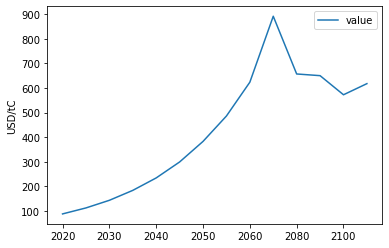

In [21]:
# quick visualization to check the emission tax trajectory
fig, ax = plt.subplots()
df_emi_tax.plot(x="type_year", ax=ax)
ax.set_ylabel("USD/tC")
ax.set_xlabel("")

In [ ]:
df_emi_bound = target_scen.par("bound_emission")

In [ ]:
# remove emission bound from target scenario
# and add tax emission from peak scenario
target_scen.check_out()
if len(df_emi_bound) != 0:
    target_scen.remove_par("bound_emission", df_emi_bound)
target_scen.add_par("tax_emission", df_emi_tax)
target_scen.commit("add emission tax to emulate peak budget scenario")